# Telco Customer Churn

In this project, we predict behavior to retain customers. We use supervised learning models to predict customers who are likely to stop using telecommunication service in the future. In addition, we will analyze top factors that influence customer retention.

Data source: https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.figure_factory as ff
pyo.init_notebook_mode()
import pydot
from graphviz import Source
from IPython.display import display

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.tree import export_graphviz
from scipy.stats import pearsonr

In [3]:
LABEL = 'Churn' # target column
LABEL_ONE = 'Yes'
LABEL_ZERO = 'No'

## 1. Data Exploration

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 21 columns (features).

The "Churn" column is our target.

The data contains the following columns:
	
**customerID**: Customer ID<br>
**gender**: Whether the customer is a male or a female<br>
**SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0)<br>
**Partner**: Whether the customer has a partner or not (Yes, No)<br>
**Dependents**: Whether the customer has dependents or not (Yes, No)<br>
**tenure**: Number of months the customer has stayed with the company<br>
**PhoneService**: Whether the customer has a phone service or not (Yes, No)<br>
**MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service)<br>
**InternetService**: Customer’s internet service provider (DSL, Fiber optic, No)<br>
**OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service)<br>
**OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service)<br>
**DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)<br>
**TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service)<br>
**StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)<br>
**StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service)<br>
**Contract**: The contract term of the customer (Month-to-month, One year, Two year)<br>
**PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No)<br>
**PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
**MonthlyCharges**: The amount charged to the customer monthly<br>
**TotalCharges**: The total amount charged to the customer<br>

### 1.1 Import and Understand the Raw Data

In [4]:
churn_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
churn_df.head(n = 10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   
5               Yes     Fiber optic             No           No   
6               Yes     Fiber optic             No          Yes   
7  No phone service             DSL            Yes           No   
8               Yes     Fiber optic             No           No   
9                No             DSL            Yes          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   
5              Yes          No         Yes             Yes  Month-to-month   
6               No          No         Yes              No  Month-to-month   
7               No          No          No              No  Month-to-month   
8              Yes         Yes         Yes             Yes  Month-to-month   
9               No          No          No              No        One year   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   
5              Yes           Electronic check           99.65        820.5   
6              Yes    Credit card (automatic)           89.10       1949.4   
7               No               Mailed check           29.75        301.9   
8              Yes           Electronic check          104.80      3046.05   
9               No  Bank transfer (automatic)           56.15      3487.95   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes  
5   Yes  
6    No  
7    No  
8   Yes  
9    No

In [6]:
print("Number of rows: " + str(churn_df.shape[0]))
print("Number of columns: " + str(churn_df.shape[1]))
print("\nColumns: \n", churn_df.columns.tolist())
print("\nUnique values of each column: \n", churn_df.nunique())

Number of rows: 7043
Number of columns: 21

Columns: 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Unique values of each column: 
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [7]:
churn_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### 1.2 Data Cleaning 

In [8]:
# illustrate how to remove whitespaces in the string

churn_df['PhoneService'] += ' ' 
churn_df['PhoneService'][0]

'No '

In [9]:
churn_df['PhoneService'] = churn_df['PhoneService'].map(lambda x : x.strip())
churn_df['PhoneService'][0]

'No'

### 1.3 Handling the Missing Values

Two common ways to handle missing values:

1. We delete a particular row if it has a null value for a particular feature and a particular column if it has more than 75% of missing values. This method is advised only when there are enough samples in the data set. One has to make sure that after we have deleted the data, there is no addition of bias. 

2. This strategy can be applied on a feature which has numeric data. We can calculate the mean, median or mode of the feature and replace it with the missing values. This is an approximation which can add variance to the data set. But the loss of the data can be negated by this method which yields better results compared to removal of rows and columns. Replacing with the above three approximations are a statistical approach of handling the missing values. This method is also called as leaking the data while training. Another way is to approximate it with the deviation of neighbouring values. This works better if the data is linear.

In [10]:
# Replace missing values with null values

churn_df = churn_df.replace('^\s*$', np.nan, regex = True)

In [11]:
# check for the missing values

churn_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# Since only 11/7043 of the rows have missing values, we simply drop them
churn_df = churn_df[churn_df['TotalCharges'].notnull()]

# reset the indices since we have deleted some rows
churn_df = churn_df.reset_index()[churn_df.columns] # we don't need the index columns

### 1.4 Data Visualization

In [13]:
# Make a copy of the dataframe

df_vis = churn_df.copy()

In [14]:
# replace "1 or 0" in column "SeniorCitizen" by "Yes or No"

df_vis["SeniorCitizen"] = df_vis["SeniorCitizen"].replace({1 : "Yes", 0 : "No"})

In [15]:
# Simplify "PaymentMethod" column

df_vis["PaymentMethod"] = df_vis["PaymentMethod"].replace({ "Bank transfer (automatic)": "Bank transer", 
                                                           "Credit card (automatic)" : "Credit card"})

In [16]:
# convert the "TotalCharges" column to float type

df_vis['TotalCharges'] = df_vis['TotalCharges'].astype(float)

In [17]:
# Set tenure to different ranges, based on number of years

def tenure_range(tenure):
    if tenure <= 12:
        return 'tenure_1_year'
    elif tenure <= 24:
        return 'tenure_2_year'
    elif tenure <= 36:
        return 'tenure_3_year'
    elif tenure <= 48:
        return 'tenure_4_year'
    elif tenure <= 60:
        return 'tenure_5_year'
    else:
        return 'tenure_5_year_more'
    
df_vis['tenure'] = df_vis['tenure'].map(lambda x : tenure_range(x))

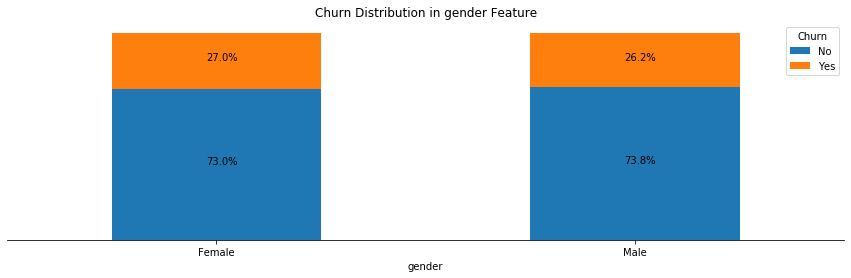

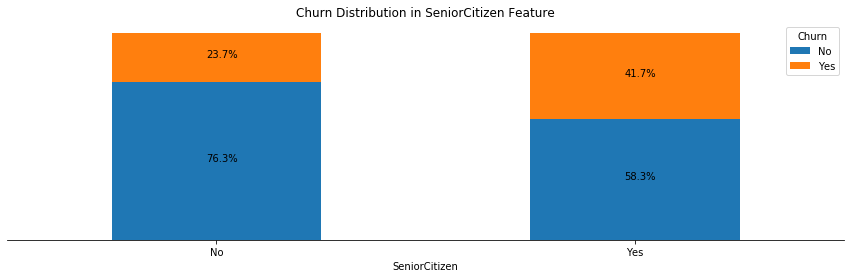

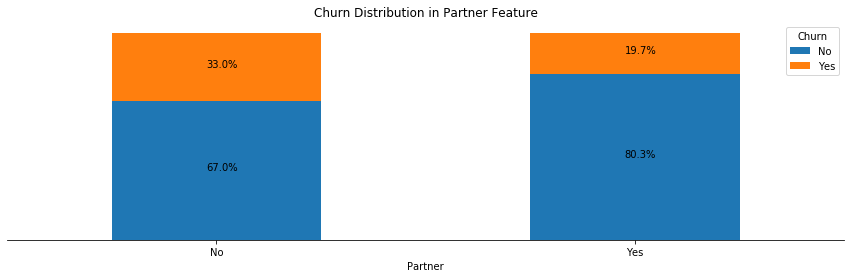

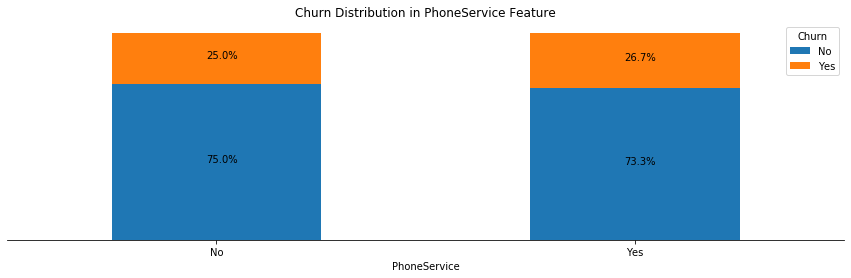

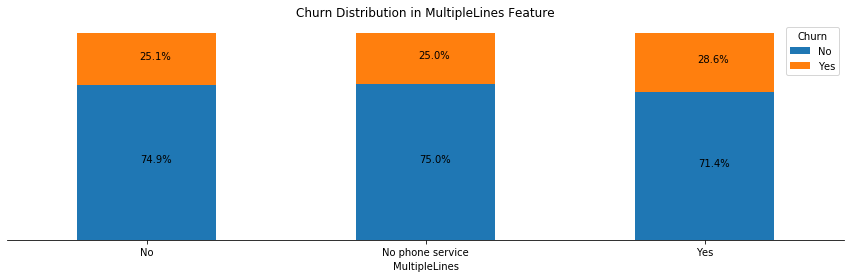

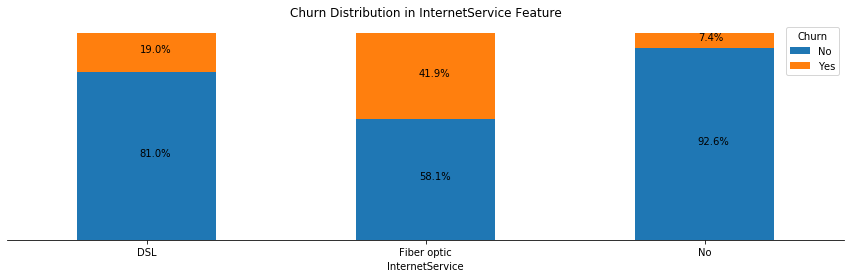

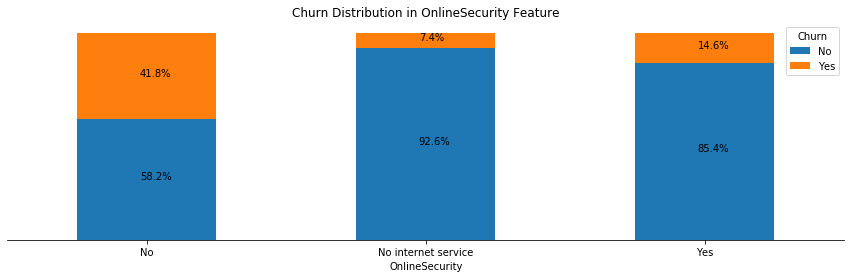

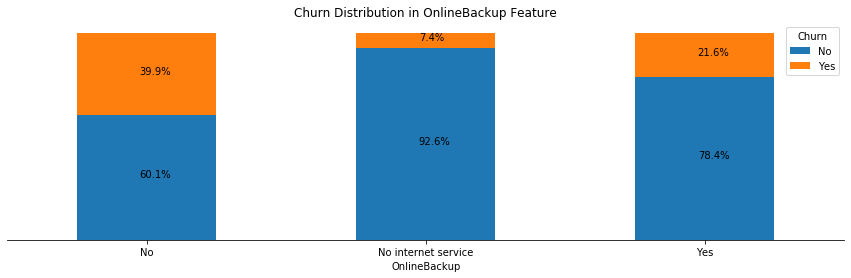

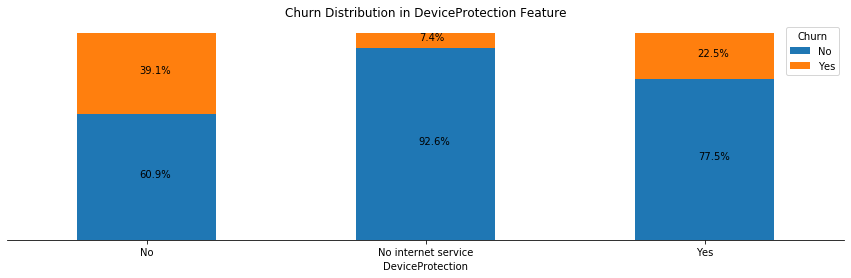

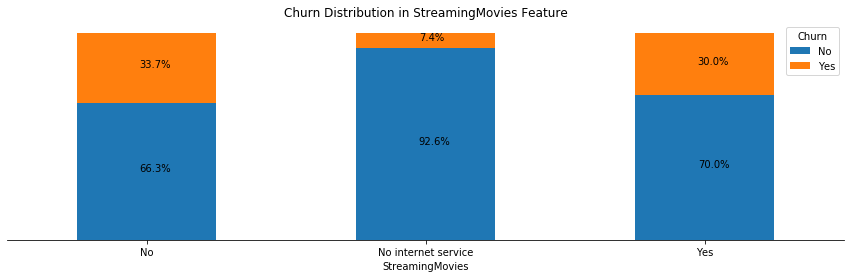

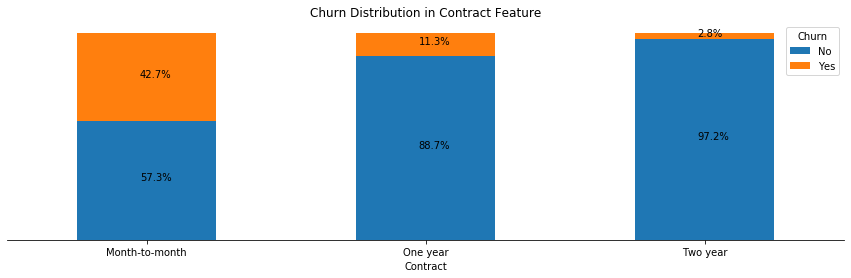

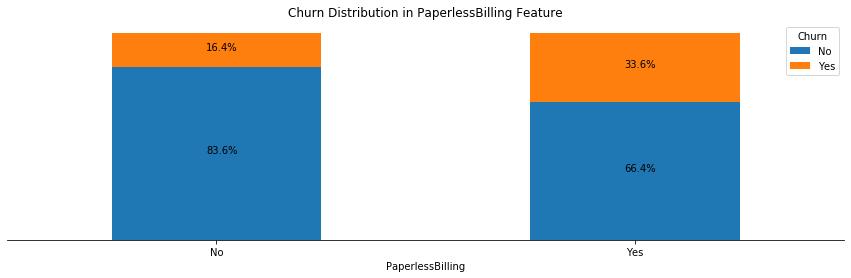

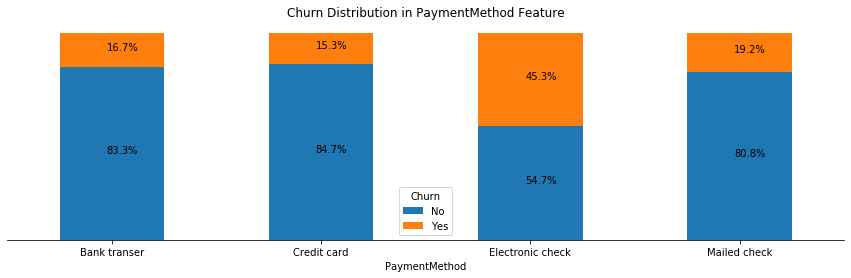

In [18]:
# Plot churn and not_churn distribution in each feature

# do not plot these columns
to_drop_vis = ['customerID', 'Churn']

# Categorical features to be plotted
cat_cols_vis = df_vis.nunique()[df_vis.nunique() <= 6].keys().tolist()
cat_cols_vis = [x for x in cat_cols_vis if x not in to_drop_vis]

for col in cat_cols_vis:
    ax = df_vis.groupby(col)['Churn'].value_counts(normalize = True).unstack().plot(kind = 'bar', stacked = True, rot = 0,
                                                                                    figsize = (15,4),
                                                                                    title = 'Churn Distribution in ' + col + ' Feature')
    ax.get_yaxis().set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
        
    # put the percentage on the graph
    for i in range(len(ax.patches)):
        p = ax.patches[i]
        if i < len(ax.patches) // 2:
            ax.annotate("{0:.1%}".format(p.get_height()), (p.get_x() + p.get_width() * 0.45, 0.5 * p.get_height()))
        else:
            ax.annotate("{:.1%}".format(p.get_height()), (p.get_x() + p.get_width() * 0.45, 1 - 0.5 * p.get_height()))

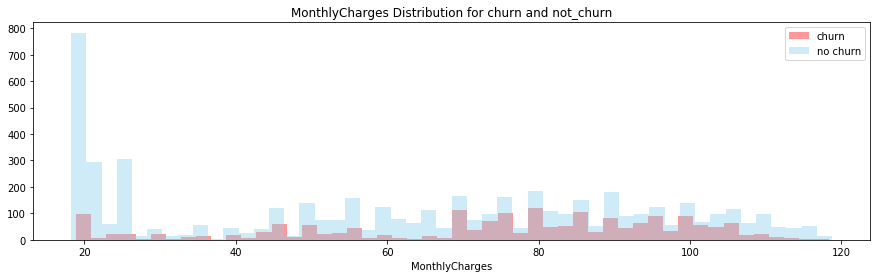

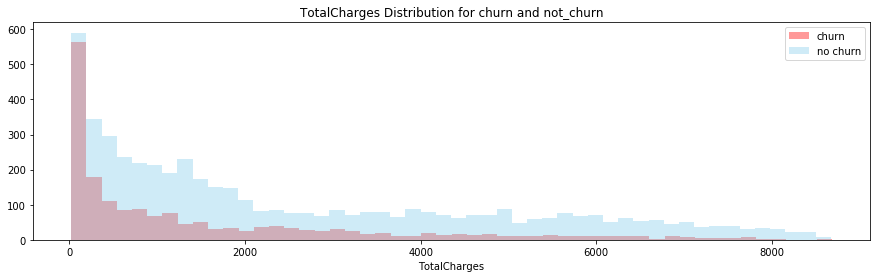

In [19]:
# get the numerical features
num_cols_vis = [x for x in df_vis.columns if x not in (cat_cols_vis + to_drop_vis)]

# Separate churn and no_churn data
df_vis_churn = df_vis[df_vis['Churn'] == 'Yes']
df_vis_not_churn = df_vis[df_vis['Churn'] == 'No']

for col in num_cols_vis:
    plt.figure(figsize = (15, 4))
    plt.title(col + " Distribution for churn and not_churn")
    sns.distplot(df_vis_churn[col], bins = 50, color = 'red', kde = False, label = 'churn')
    sns.distplot(df_vis_not_churn[col], bins = 50, color = 'skyblue', kde = False, label = 'no churn')
    plt.legend()

### 1.5 Feature Preprocessing

In [20]:
# Drop some useless columns and the target column

to_drop = ['customerID', 'Churn']
churn_feat_space = churn_df.drop(labels = to_drop, axis = 1)

In [21]:
# replace "No internet service" or "No phone service" by "No"

churn_feat_space = churn_feat_space.replace({"No phone service" : "No", "No internet service" : "No"})

In [22]:
# convert the "TotalCharges" column to float type

churn_feat_space['TotalCharges'] = churn_feat_space['TotalCharges'].astype(float)

In [23]:
# get the column list with categorical values
cat_cols = churn_feat_space.nunique()[churn_feat_space.nunique() <= 4].keys().tolist()

# get the column list with numerical values
num_cols = [x for x in churn_feat_space.columns if x not in cat_cols]

# get the column list with two categories
binary_cols = churn_feat_space.nunique()[churn_feat_space.nunique() == 2].keys().tolist()

# get the column list with three or more categories
multi_cols = [x for x in cat_cols if x not in binary_cols]

In [24]:
# preprocess the columns with numerical values, scale the data
scaler = StandardScaler()
churn_scaled = scaler.fit_transform(X = churn_feat_space[num_cols]) # return numpy array, need to convert to dataframe
churn_scaled = pd.DataFrame(data = churn_scaled, columns = num_cols)
churn_feat_space = churn_feat_space[cat_cols].merge(churn_scaled, how = 'left', left_index = True, right_index = True)

# preprocess the columns with two categories
encoder = LabelEncoder()
for col in binary_cols:
    churn_feat_space[col] = encoder.fit_transform(churn_feat_space[col])
    
# preprocess the columns with three or more categories
churn_feat_space = pd.get_dummies(data = churn_feat_space, columns = multi_cols)

# contain the target column
churn_feat_space_and_target = churn_df[['Churn']].merge(churn_feat_space, how = 'left', left_index = True, right_index = True)

In [25]:
churn_feat_space_and_target.head()

Churn  gender  SeniorCitizen  Partner  Dependents  PhoneService  \
0    No       0              0        1           0             0   
1    No       1              0        0           0             1   
2   Yes       1              0        0           0             1   
3    No       1              0        0           0             0   
4   Yes       0              0        0           0             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
0              0               0             1                 0            0   
1              0               1             0                 1            0   
2              0               1             1                 0            0   
3              0               1             0                 1            1   
4              0               0             0                 0            0   

   StreamingTV  StreamingMovies  PaperlessBilling    tenure  MonthlyCharges  \
0            0                0                 1 -1.280248       -1.161694   
1            0                0                 0  0.064303       -0.260878   
2            0                0                 1 -1.239504       -0.363923   
3            0                0                 0  0.512486       -0.747850   
4            0                0                 1 -1.239504        0.196178   

   TotalCharges  InternetService_DSL  InternetService_Fiber optic  \
0     -0.994194                    1                            0   
1     -0.173740                    1                            0   
2     -0.959649                    1                            0   
3     -0.195248                    1                            0   
4     -0.940457                    0                            1   

   InternetService_No  Contract_Month-to-month  Contract_One year  \
0                   0                        1                  0   
1                   0                        0                  1   
2                   0                        1                  0   
3                   0                        0                  1   
4                   0                        1                  0   

   Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
0                  0                                        0   
1                  0                                        0   
2                  0                                        0   
3                  0                                        1   
4                  0                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0

In [26]:
churn_feat_space.dtypes

gender                                       int32
SeniorCitizen                                int64
Partner                                      int32
Dependents                                   int32
PhoneService                                 int32
MultipleLines                                int32
OnlineSecurity                               int32
OnlineBackup                                 int32
DeviceProtection                             int32
TechSupport                                  int32
StreamingTV                                  int32
StreamingMovies                              int32
PaperlessBilling                             int32
tenure                                     float64
MonthlyCharges                             float64
TotalCharges                               float64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
Contract_Month-to-month        

### 1.6 Feature Correlation

In [27]:
# Calculate the correlation matrix

corr = churn_feat_space.corr()
corr

gender  SeniorCitizen   Partner  \
gender                                   1.000000      -0.001819 -0.001379   
SeniorCitizen                           -0.001819       1.000000  0.016957   
Partner                                 -0.001379       0.016957  1.000000   
Dependents                               0.010349      -0.210550  0.452269   
PhoneService                            -0.007515       0.008392  0.018397   
MultipleLines                           -0.008883       0.142996  0.142561   
OnlineSecurity                          -0.016328      -0.038576  0.143346   
OnlineBackup                            -0.013093       0.066663  0.141849   
DeviceProtection                        -0.000807       0.059514  0.153556   
TechSupport                             -0.008507      -0.060577  0.120206   
StreamingTV                             -0.007124       0.105445  0.124483   
StreamingMovies                         -0.010105       0.119842  0.118108   
PaperlessBilling                        -0.011902       0.156258 -0.013957   
tenure                                   0.005285       0.015683  0.381912   
MonthlyCharges                          -0.013779       0.219874  0.097825   
TotalCharges                             0.000048       0.102411  0.319072   
InternetService_DSL                      0.007584      -0.108276 -0.001043   
InternetService_Fiber optic             -0.011189       0.254923  0.001235   
InternetService_No                       0.004745      -0.182519 -0.000286   
Contract_Month-to-month                 -0.003251       0.137752 -0.280202   
Contract_One year                        0.007755      -0.046491  0.083067   
Contract_Two year                       -0.003603      -0.116205  0.247334   
PaymentMethod_Bank transfer (automatic) -0.015973      -0.016235  0.111406   
PaymentMethod_Credit card (automatic)    0.001632      -0.024359  0.082327   
PaymentMethod_Electronic check           0.000844       0.171322 -0.083207   
PaymentMethod_Mailed check               0.013199      -0.152987 -0.096948   

                                         Dependents  PhoneService  \
gender                                     0.010349     -0.007515   
SeniorCitizen                             -0.210550      0.008392   
Partner                                    0.452269      0.018397   
Dependents                                 1.000000     -0.001078   
PhoneService                              -0.001078      1.000000   
MultipleLines                             -0.024307      0.279530   
OnlineSecurity                             0.080786     -0.091676   
OnlineBackup                               0.023639     -0.052133   
DeviceProtection                           0.013900     -0.070076   
TechSupport                                0.063053     -0.095138   
StreamingTV                               -0.016499     -0.021383   
StreamingMovies                           -0.038375     -0.033477   
PaperlessBilling                          -0.110131      0.016696   
tenure                                     0.163386      0.007877   
MonthlyCharges                            -0.112343      0.248033   
TotalCharges                               0.064653      0.113008   
InternetService_DSL                        0.051593     -0.452255   
InternetService_Fiber optic               -0.164101      0.290183   
InternetService_No                         0.138383      0.171817   
Contract_Month-to-month                   -0.229715     -0.001243   
Contract_One year                          0.069222     -0.003142   
Contract_Two year                          0.201699      0.004442   
PaymentMethod_Bank transfer (automatic)    0.052369      0.008271   
PaymentMethod_Credit card (automatic)      0.061134     -0.006916   
PaymentMethod_Electronic check            -0.149274      0.002747   
PaymentMethod_Mailed check                 0.056448     -0.004463   

                                         MultipleLines  OnlineSecurity  

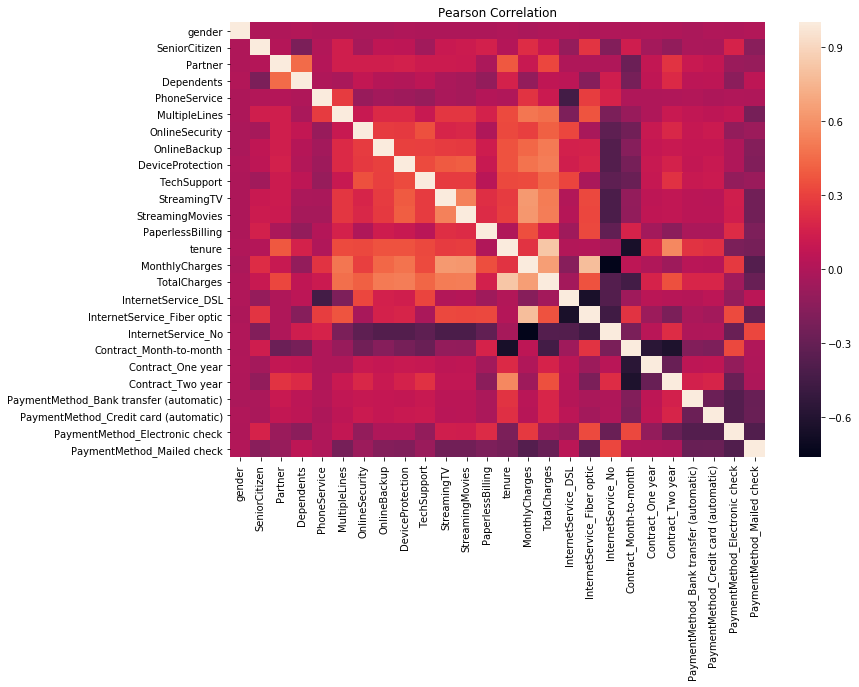

In [28]:
plt.figure(figsize = (12, 8))
plt.title('Pearson Correlation')
g = sns.heatmap(corr, xticklabels = True, yticklabels = True)

In [29]:
# Alternative way to get the pearson correlation between two variables

pearsonr(churn_feat_space["TotalCharges"], churn_feat_space["MonthlyCharges"])[0]

0.6510648032262025

### 1.7 Radar Chart for Binary Features

In [30]:
# remove features which are not binary
binary_cols_radar = churn_feat_space.nunique()[churn_feat_space.nunique() == 2].keys().tolist()
to_drop_radar = [x for x in churn_feat_space.columns if x not in binary_cols_radar]
churn_bifeat_and_target_radar = churn_feat_space_and_target.drop(labels = to_drop_radar, axis = 1)

# separate churn and not_churn
bifeat_churn_radar = churn_bifeat_and_target_radar[churn_bifeat_and_target_radar['Churn'] == 'Yes'][binary_cols_radar]
bifeat_no_churn_radar = churn_bifeat_and_target_radar[churn_bifeat_and_target_radar['Churn'] == 'No'][binary_cols_radar]

# count the number of 1 in each column, for churn and not_churn
bifeat_churn_radar = bifeat_churn_radar.sum()
bifeat_no_churn_radar = bifeat_no_churn_radar.sum()

In [31]:
def radar_chart(categories, values, title):
    data = go.Scatterpolar(r = values, theta = categories, mode = 'lines+markers', fill = 'toself', fillcolor = 'skyblue')
    layout = go.Layout(dict(polar = dict(radialaxis = dict(side = 'counterclockwise', linecolor = 'black', 
                                                           ticks = 'outside', gridcolor = 'black'), 
                                         angularaxis = dict(gridcolor = 'black', linecolor = 'black'), 
                                         bgcolor = "white"), 
                            title = dict(text = title, font = dict(family = 'Times New Roman', size = 25), x = 0.5), 
                            )
                      )
    fig = go.Figure(data = [data], layout = layout)
    pyo.iplot(fig)

In [32]:
categories = bifeat_churn_radar.keys().tolist()
values = bifeat_churn_radar.values.tolist()
radar_chart(categories, values, 'Churn: sum of 1')

In [33]:
categories = bifeat_no_churn_radar.keys().tolist()
values = bifeat_no_churn_radar.values.tolist()
radar_chart(categories, values, 'No_Churn: sum of 1')

## 2. Model Training Using Grid Search to Find Optimal Parameters and Result Evaluation 

In [34]:
target_col = [LABEL]
df_data = churn_feat_space_and_target
X = df_data.drop(labels = target_col, axis = 1) # pandas dataframe
y = np.where(df_data[LABEL] == LABEL_ONE, 1, 0) # numpy array

In [35]:
def run_ml(X, y, algorithm, algorithm_name, n_folds = None, feature_importance_attr = None):
    """
    Run the machine learning model and show the results.
    
    Parameters:
    X: input features, dataframe
    y: input labels, numpy array
    algorithm: an object of the model class, e.g., sklearn.linear_model.LogisticRegression
    algorithm_name: name of the model
    n_folds: if not None, use k-fold cross validation, and n_folds is the number of folds.
    feature_importance_attr: if not None, it is the attribute name of the model class to get the feature importance
    
    Returns:
    algorithm: the trained model
    performance: the model performance dataframe, with columns of 'Model', 'Test Data Size', 'Accurary', 'Precision (1)', 
                'Recall (1)', 'F1 Score', 'AUC'
    df_feat_importance: the dataframe showing the importance of all features
    """
    
    # 1. Model training
    
    if n_folds is not None:
        y_test_pred = y.copy()
        y_test_prob = np.zeros(y.shape)
        # Construct a kfolds object
        kf = KFold(n_splits = n_folds, shuffle = True)
        # Iterate through folds
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train = y[train_index]
            # Fit the model according to the given training data.
            algorithm.fit(X_train, y_train)
            # Predict class labels for samples in X.
            # Note that the threshold is 0.5
            y_test_pred[test_index] = algorithm.predict(X_test)         
            # Return estimates for all classes.
            # predict() will give 0 or 1 as output; predict_proba() will give the probability of 0 (in column 0) and 1 (in column 1).
            y_test_prob[test_index] = algorithm.predict_proba(X_test)[:, 1]
        y_test = y # all data is used as test set
        X_test = X
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0) 
        # Fit the model according to the given training data.
        algorithm.fit(X_train, y_train)
        # Predict class labels for samples in X.
        # Note that the threshold is 0.5
        y_test_pred = algorithm.predict(X_test)
        # Return estimates for all classes.
        # predict() will give 0 or 1 as output; predict_proba() will give the probability of 0 (in column 0) and 1 (in column 1).
        y_test_prob = algorithm.predict_proba(X_test)[:, 1]
    
    # 2. Show the results
    
    if n_folds is not None:
        print('\nSummary of ' + str(algorithm_name) + ' Model with ' + str(n_folds) + '-Fold Cross Validation:')
    else:
        print('\nSummary of ' + str(algorithm_name) + ' Model:')
    
    # 2.1 Print the model details
    
    print('\nAlgorithm:\n') 
    print(algorithm)

    # 2.2 Print the test accuracy
    
    print('\nTest Accuracy:', accuracy_score(y_true = y_test, y_pred = y_test_pred))
    
    # 2.3 Print the classification report
    
    print('\nClassification Report:\n', classification_report(y_true = y_test, y_pred = y_test_pred))
    
    # 2.4 Print and plot the receiver operating characteristic (ROC)
    
    auc = roc_auc_score(y_true = y_test, y_score = y_test_prob)
    fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = y_test_prob)
    trace_roc = go.Scatter(x = fpr, y = tpr)
    trace_roc_diag = go.Scatter(x =[0, 1], y = [0, 1], line = dict(dash = "dash"))
    
    # 2.5 Calculate and plot the confusion matrix
    
    conf_matrix = confusion_matrix(y_true = y_test, y_pred = y_test_pred)
    trace_conf_matrix = go.Heatmap(z = conf_matrix / len(y_test), x = ['Predicted: ' + str(algorithm.classes_[0]), 
                                                                       'Predicted: ' + str(algorithm.classes_[1])],
                                   y = ['True: ' + str(algorithm.classes_[0]), 'True: ' + str(algorithm.classes_[1])])
    
    # 2.6 Calculate and plot accurary, recall and precision according to different thresholds
    
    if thresholds[0] > 1: # the library code adds a large at index 0 for some specific reason; we don't need it.
        thresholds = thresholds[1:]
    accuracy = np.zeros(thresholds.shape)
    precision = np.zeros(thresholds.shape)
    recall = np.zeros(thresholds.shape)
    for i in range(len(thresholds)):
        y_test_pred_i = (algorithm.predict_proba(X_test)[:, 1] >= thresholds[i])
        cm_i = confusion_matrix(y_true = y_test, y_pred = y_test_pred_i)
        tp = cm_i[1][1]
        tn = cm_i[0][0]
        fp = cm_i[0][1]
        fn = cm_i[1][0]
        accuracy[i] = (tp + tn) / (tp + fp + fn + tn + 0.0)
        recall[i] = tp / (tp + fn + 0.0)
        precision[i] = tp / (tp + fp + 0.0)
    trace_acc = go.Scatter(x = thresholds, y = accuracy, name = 'Accuracy')
    trace_recall = go.Scatter(x = thresholds, y = recall, name = 'Recall (Positive)')
    trace_precision = go.Scatter(x = thresholds, y = precision, name = 'Precision (Positive)')
    
    # 2.7 Calculate and plot feature importance
    
    if feature_importance_attr is not None:
        feature_importance = np.squeeze(getattr(algorithm, feature_importance_attr))
        dict_feat_importance = {'cols' : X.columns, 'importance' : feature_importance}
        df_feat_importance = pd.DataFrame(data = dict_feat_importance)
        df_feat_importance = df_feat_importance.iloc[df_feat_importance.importance.abs().argsort()[::-1]] # [::-1] to get decreasing order
        trace_feat_importance = go.Bar(x = df_feat_importance['cols'], y = df_feat_importance['importance']) # bar plot
    
    # 3. Show the figures
    
    fig1 = py.subplots.make_subplots(rows = 1, cols = 2, subplot_titles = ('ROC', 'Confusion Matrix'), 
                                  print_grid = False) # Remove the “This is the format of your plot grid...” 
    fig1.add_trace(trace_roc, row = 1, col = 1)
    fig1.add_trace(trace_roc_diag, row = 1, col = 1)
    fig1.add_trace(trace_conf_matrix, row = 1, col = 2)
    if n_folds is not None:
        title = str(algorithm_name) + ' (' + str(n_folds) + '-Fold Cross Validation)'
    else:
        title = str(algorithm_name)
    fig1['layout'].update(title = dict(text = '<b>Performance of ' + title + ' Model</b>', x = 0.5, 
                                       font = dict(family = 'Times New Roman', size = 25)), 
                          showlegend = False, 
                          annotations = [dict(x = 0.3, y = 0.1, font = dict(size = 25, color = 'white'), 
                                              text = 'AUC: ' + str(round(auc, 4)))], 
                          plot_bgcolor = 'black')
    fig1["layout"]["xaxis1"].update(dict(title = "False Positive Rate", gridcolor = 'grey'))
    fig1["layout"]["yaxis1"].update(dict(title = "True Positive Rate", gridcolor = 'grey'))
    pyo.iplot(fig1)
    
    fig2 = go.Figure()
    fig2.add_trace(trace_acc)
    fig2.add_trace(trace_recall)
    fig2.add_trace(trace_precision)
    fig2['layout'].update(title = dict(text = '<b>Threshold Plot</b>', x = 0.5), titlefont = dict(size = 20), showlegend = True, 
                          plot_bgcolor = "rgb(200, 200, 200)")
    fig2["layout"]["xaxis"].update(dict(title = "Threshold"))
    fig2["layout"]["yaxis"].update(dict(title = "Score"))
    pyo.iplot(fig2)
    
    if feature_importance_attr is not None:
        fig3 = go.Figure()
        fig3.add_trace(trace_feat_importance)
        fig3['layout'].update(title = dict(text = '<b>Feature Importance</b>', x = 0.5), titlefont = dict(size = 20), 
                              plot_bgcolor = "rgb(223, 237, 245)")
        fig3["layout"]["xaxis"].update(dict(tickangle = 90, tickfont = dict(size = 10)))
        pyo.iplot(fig3)
    
    # contruct the performance dataframe
    test_size = X_test.shape[0]
    tp = conf_matrix[1][1]
    tn = conf_matrix[0][0]
    fp = conf_matrix[0][1]
    fn = conf_matrix[1][0]
    acc = (tp + tn) / (tp + fp + fn + tn + 0.0) # accuracy
    rec = tp / (tp + fn + 0.0) # recall
    prec = tp / (tp + fp + 0.0) # precision
    f1 = 2 * (prec * rec) / (prec + rec)
    performance = {'Model' : [algorithm_name + '<br>(N_Folds: ' + str(n_folds) + ')'], 'Test Data Size' : [test_size], 
                   'Accuracy' : [acc], 'Precision (1)' : [prec], 'Recall (1)' : [rec], 'F1 Score' : [f1], 'AUC' : [auc]}
    performance = pd.DataFrame(data = performance)
    
    # construct the feature importance dataframe
    feat_importance = None
    if feature_importance_attr is not None:
        feat_importance = {'Features' : X.columns, algorithm_name + '<br>(N_Folds: ' + str(n_folds) + ')' : feature_importance}
        feat_importance = pd.DataFrame(data = feat_importance)
        feat_importance = feat_importance.set_index(keys = 'Features')
        
    return algorithm, performance, feat_importance

In [36]:
def grid_search(X, y, algorithm, parameters):
    """
    Use grid search to find the optimal paramters for the model
    Parameters:
    X: input features, dataframe
    y: input labels, numpy array
    algorithm: an object of the model class, e.g., sklearn.linear_model.LogisticRegression
    paramters: dict or list of dictionaries. Dictionary with parameters names (string) as keys and lists of parameter settings to 
                try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are 
                explored. This enables searching over any sequence of parameter settings.
    Returns:
    dictionary of best paramters.
    """

    gs = GridSearchCV(estimator = algorithm, param_grid = parameters, cv = 5, verbose = 1, refit = False)
    gs.fit(X, y)
    print('\nBest Score:', gs.best_score_)
    print('\nBest Parameter Set:', gs.best_params_)
    return gs.best_params_

### 2.1 Logistic Regression

In [37]:
logis = LogisticRegression(max_iter = 100, multi_class = 'ovr', n_jobs = 1, solver = 'liblinear', verbose = 0, warm_start = False)

In [38]:
parameters = {
    'penalty' : ['l1', 'l2'], 
    'C' : 0.001 * 10 ** (np.arange(0, 1.02, 0.02) * 4) # 0.001 to 10
}
logis_params = grid_search(X, y, logis, parameters)

Fitting 5 folds for each of 102 candidates, totalling 510 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Best Score: 0.8041808873720137

Best Parameter Set: {'C': 4.786300923226385, 'penalty': 'l2'}


[Parallel(n_jobs=1)]: Done 510 out of 510 | elapsed:   39.4s finished


In [39]:
logis = LogisticRegression(max_iter = 100, multi_class = 'ovr', n_jobs = 1, C = logis_params['C'], 
                            penalty = logis_params['penalty'], solver = 'liblinear', verbose = 0, warm_start = False)
_, performance_lr, feat_importance_lr = run_ml(X, y, logis, 'Logistic Regression', n_folds = None, feature_importance_attr = 'coef_')


Summary of Logistic Regression Model:

Algorithm:

LogisticRegression(C=4.786300923226385, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Test Accuracy: 0.8224431818181818

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       514
           1       0.72      0.57      0.63       190

    accuracy                           0.82       704
   macro avg       0.78      0.74      0.76       704
weighted avg       0.81      0.82      0.82       704



### 2.2 Logistic Regression with K-Fold Cross Validation

In [40]:
_, performance_lr_kfolds, feat_importance_lr_kfolds = run_ml(X, y, logis, 'Logistic Regression', n_folds = 5, 
                                                             feature_importance_attr = 'coef_')


Summary of Logistic Regression Model with 5-Fold Cross Validation:

Algorithm:

LogisticRegression(C=4.786300923226385, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Test Accuracy: 0.8075938566552902

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      5163
           1       0.67      0.56      0.61      1869

    accuracy                           0.81      7032
   macro avg       0.76      0.73      0.74      7032
weighted avg       0.80      0.81      0.80      7032



### 2.3 Logistic Regression with Recursive Feature Elimination (RFE)

The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [41]:
n_features_to_select = 10
logis_rfe = LogisticRegression(max_iter = 100, penalty = 'l2', C = 1, multi_class = 'ovr', n_jobs = 1, solver = 'liblinear', 
                               verbose = 0, warm_start = False)

In [42]:
rfe_logis = RFE(logis_rfe, n_features_to_select = n_features_to_select)

rfe_logis.fit(X, y)

print("Logistic Regression RFE Result:")
for k, v in sorted(zip(rfe_logis.ranking_, X.columns)):
    print(k, ':', v)

# get the selected columns
cols_selected = np.array(X.columns)[rfe_logis.support_].tolist()

Logistic Regression RFE Result:
1 : Contract_Month-to-month
1 : Contract_Two year
1 : InternetService_Fiber optic
1 : InternetService_No
1 : OnlineSecurity
1 : PaperlessBilling
1 : PhoneService
1 : TechSupport
1 : TotalCharges
1 : tenure
2 : PaymentMethod_Mailed check
3 : PaymentMethod_Credit card (automatic)
4 : PaymentMethod_Bank transfer (automatic)
5 : InternetService_DSL
6 : MultipleLines
7 : Contract_One year
8 : StreamingMovies
9 : SeniorCitizen
10 : StreamingTV
11 : OnlineBackup
12 : Dependents
13 : MonthlyCharges
14 : DeviceProtection
15 : PaymentMethod_Electronic check
16 : gender
17 : Partner


In [43]:
X_rfe = X[cols_selected]

_, performance_lr_rfe_kfolds, feat_importance_lr_rfe_kfolds = run_ml(X_rfe, y, logis_rfe, 'Logistic Regression RFE', 
                                                                     n_folds = 5, feature_importance_attr = 'coef_')


Summary of Logistic Regression RFE Model with 5-Fold Cross Validation:

Algorithm:

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Test Accuracy: 0.7987770193401593

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      5163
           1       0.64      0.55      0.59      1869

    accuracy                           0.80      7032
   macro avg       0.74      0.72      0.73      7032
weighted avg       0.79      0.80      0.79      7032



### 2.4  K Nearest Neighbors with K-Fold Cross Validation

In [44]:
knn = KNeighborsClassifier()

In [45]:
parameters = {
    'n_neighbors' : np.arange(4, 20, 4) 
}
knn_params = grid_search(X, y, knn, parameters)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Best Score: 0.7922354948805461

Best Parameter Set: {'n_neighbors': 16}


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    5.3s finished


In [46]:
knn = KNeighborsClassifier(n_neighbors = knn_params['n_neighbors'])
_, performance_knn_kfolds, feat_importance_knn_kfolds = run_ml(X, y, knn, 'K-Nearest-Neighbors', n_folds = 5, 
                                                               feature_importance_attr = None)


Summary of K-Nearest-Neighbors Model with 5-Fold Cross Validation:

Algorithm:

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')

Test Accuracy: 0.7925199089874858

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      5163
           1       0.64      0.51      0.57      1869

    accuracy                           0.79      7032
   macro avg       0.74      0.70      0.71      7032
weighted avg       0.78      0.79      0.78      7032



### 2.5  Random Forest with K-Fold Cross Validation

In [47]:
rand_forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

In [48]:
rand_forest, performance_rf_kfolds, feat_importance_rf_kfolds = run_ml(X, y, rand_forest, 'Random Forest', n_folds = 5, 
                                                                       feature_importance_attr = 'feature_importances_')


Summary of Random Forest Model with 5-Fold Cross Validation:

Algorithm:

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Test Accuracy: 0.7864050056882821

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      5163
           1       0.63      0.49      0.55      1869

    accuracy                           0.79      7032
   macro avg       0.73      0.69      0.70      7032
weighted avg       0.77      0.79      0.78      7032



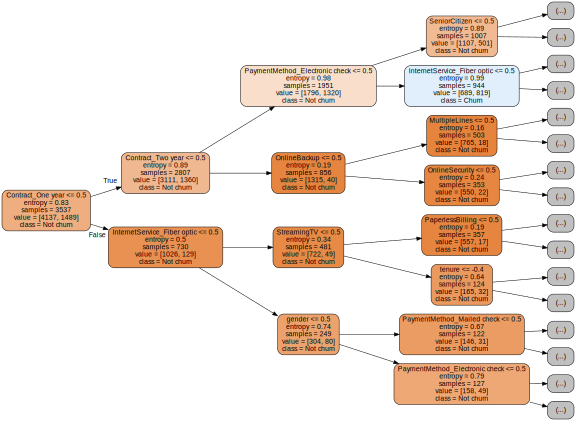

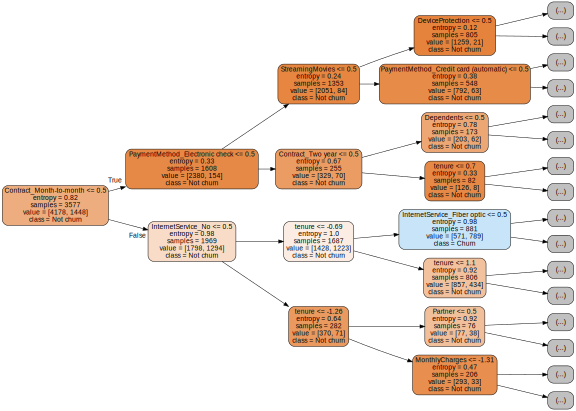

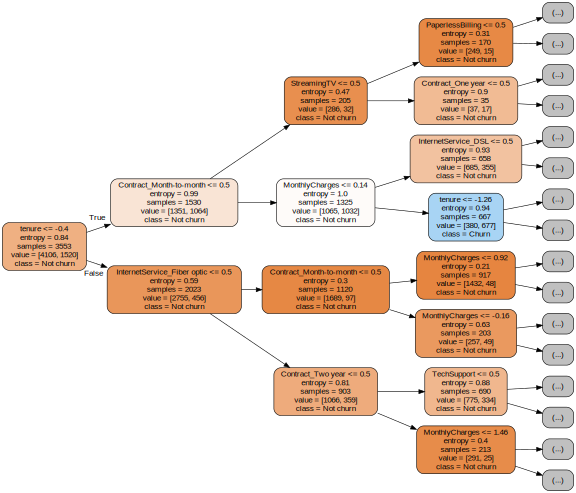

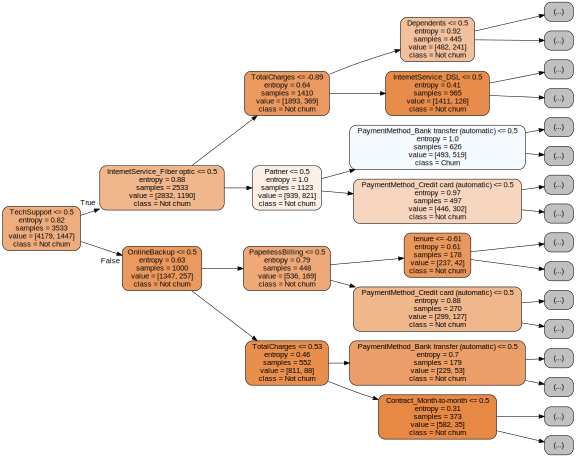

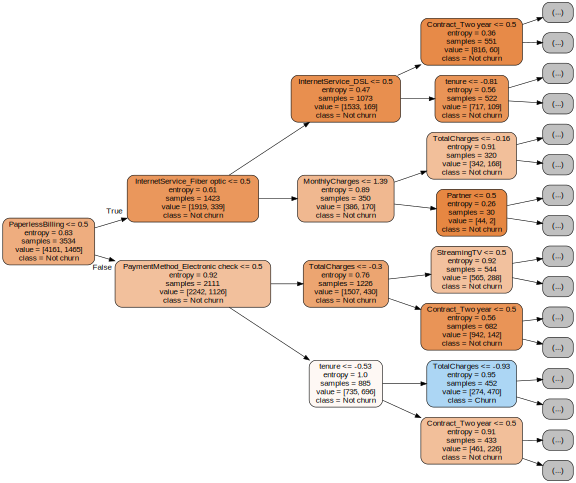

In [49]:
# Plot some of the decision trees

for i in range(5):
    dot_data = export_graphviz(rand_forest.estimators_[i], out_file = None, max_depth = 3, feature_names = X.columns.tolist(),
                               rounded = True, proportion = False, precision = 2, class_names = ["Not churn","Churn"],
                               filled = True, rotate = True)
    pdot = pydot.graph_from_dot_data(dot_data)
    # Access element [0] because graph_from_dot_data actually returns a list of DOT elements.
    pdot[0].set_graph_defaults(size = "\"8,8\"")
    graph = Source(pdot[0].to_string())
    display(graph)

**value**: the list represents the count of samples in each class that have reached that node.<br>
**sample**: if using bootstrap, this number is not equal to the sum of the numbers in 'value'.

## 3. Summary

### 3.1 Model Performance

In [50]:
# contruct the dataframe table including the performance of all models

performances_df = pd.DataFrame()
performance_df = [performance_lr, performance_lr_kfolds, performance_lr_rfe_kfolds, performance_knn_kfolds, performance_rf_kfolds]
for i in performance_df:
    performances_df = performances_df.append(i, sort = False)

In [51]:
# bar chart comparing the performance of different models

metrices = ['Accuracy', 'Precision (1)', 'Recall (1)', 'F1 Score', 'AUC']
traces_performance = []
for metric in metrices:
    trace = go.Bar(y = performances_df['Model'], x = performances_df[metric], orientation = 'h', name = metric)
    traces_performance.append(trace)   
layout_performance = go.Layout(title = dict(text = '<b>Model Performance Summary</b>', font = dict(family = 'Times New Roman', size = 25), 
                                            x = 0.5),
                               margin = dict(l = 150)) # 'l' in 'margin' sets the left margin in px 
fig_performance = go.Figure(data = traces_performance, layout = layout_performance)
pyo.iplot(fig_performance)

# summary table

table_performance = ff.create_table(np.round(performances_df, 4))
pyo.iplot(table_performance)

### 3.2 Feature Importance

In [52]:
feats_importance_df = pd.DataFrame()
feat_importance_df = [feat_importance_lr, feat_importance_lr_kfolds, feat_importance_lr_rfe_kfolds, feat_importance_knn_kfolds,
                     feat_importance_rf_kfolds]
for i in feat_importance_df:
    if i is not None:
        i = i.abs()
        max = i.max() # for normalization, set the max to be 1
        feats_importance_df = pd.concat([feats_importance_df, i / max], axis = 1, sort = False)

In [53]:
traces_feat_importance = []
for i in feats_importance_df.columns:
    trace = go.Bar(y = feats_importance_df.index, x = feats_importance_df[i], orientation = 'h', name = i)
    traces_feat_importance.append(trace)   
layout_feat_importance = go.Layout(title = dict(text = '<b>Feature Importance</b>', font = dict(family = 'Times New Roman', size = 25), 
                                                x = 0.5), 
                                   yaxis = dict(dtick = 1), 
                                   margin = dict(l = 300),   
                                   height = 1000)
fig_feat_importance = go.Figure(data = traces_feat_importance, layout = layout_feat_importance)
pyo.iplot(fig_feat_importance)

In [54]:
# summary table

print('Feature Importance Summary:')
table_feat_importance_mean = ff.create_table(pd.DataFrame(feats_importance_df.mean(axis = 1).sort_values(axis = 0)[::-1], 
                                      columns = ['Mean Importance']).reset_index())
pyo.iplot(table_feat_importance_mean)

Feature Importance Summary:
